# Author : Voona Sanjana

# Data Science & Business Analytics Internship

# GRIP - The Spark Foundation 

# Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

 Machine learning can be of four types- Supervised, Unsupervised, Semi-supervised and Reinforcement learning. Unlike Supervised learning, Unsupervised learning has features measured for n observations but has no response, i.e., we have unlabeled training data. In this situation we cannot predict a response (as there is no response variable) and therefore we are left with the task of finding interesting patterns in the data. Some of the important unsupervised learning algorithms are - Clustering, Principal Component Analysis(PCA) and Association Rule learning. In this kernel we will explore Clustering and PCA

# Step 1 : Importing the dataset

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\thesparkfoundation\Task -2\IRIS.csv")

In [82]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [68]:
df.shape

(150, 5)

In [69]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [71]:
#check for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [72]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=df["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# Step 3 : Data Visualization

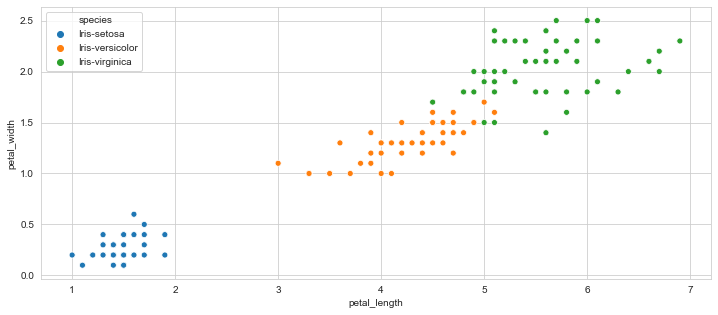

In [75]:
#numeric v/s numeric v/s categorical
plt.figure(figsize=(12,5))
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=df)
plt.show()
#scatterplot is used for numerical not in categorical

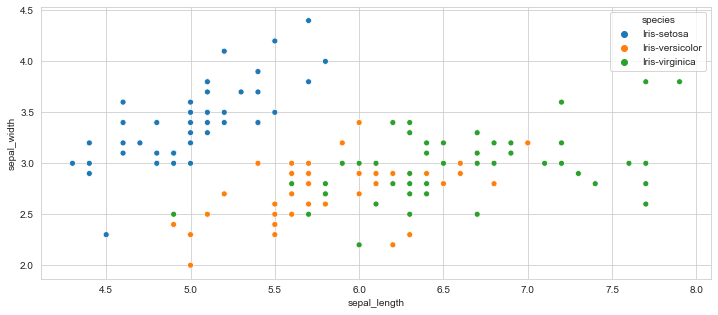

In [76]:
#numeric v/s numeric v/s categorical
plt.figure(figsize=(12,5))
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)
plt.show()
#scatterplot is used for numerical not in categorical

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


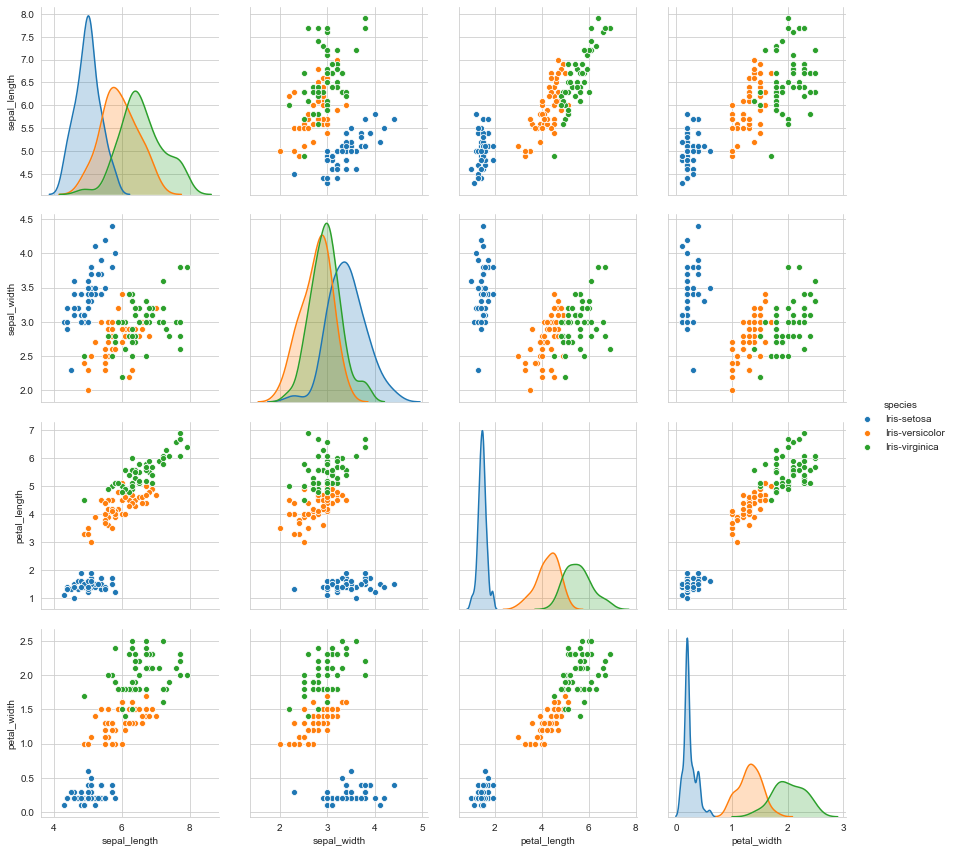

In [77]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3);
plt.show()

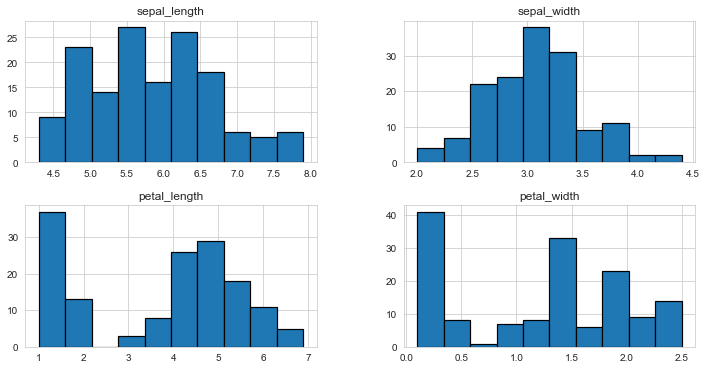

In [78]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

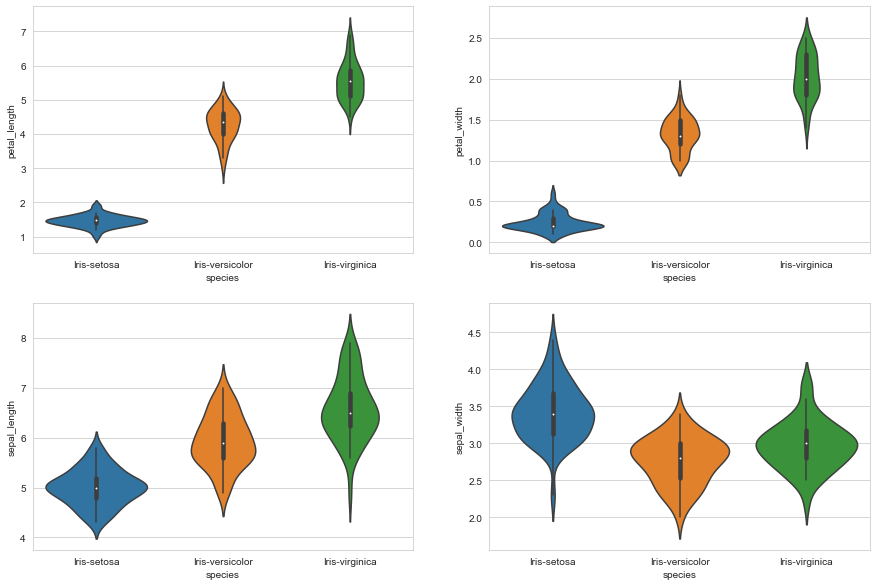

In [79]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

#  Step 3 : K-Means

# K-Mean is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

# How to Implementing K-Means Clustering ?

* Choose the number of clusters k
* Select k random points from the data as centroids
* Assign all the points to the closest cluster centroid
* Recompute the centroids of newly formed clusters
* Repeat steps 3 and 4

In [38]:
#Finding the optimum number of clusters for k-means classification
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Using the elbow method to determine the optimal number of clusters for k-means clustering

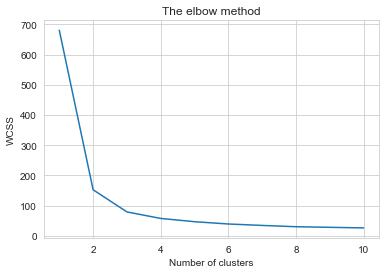

In [39]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

# Step 4 : Implementing K-Means Clustering

In [52]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


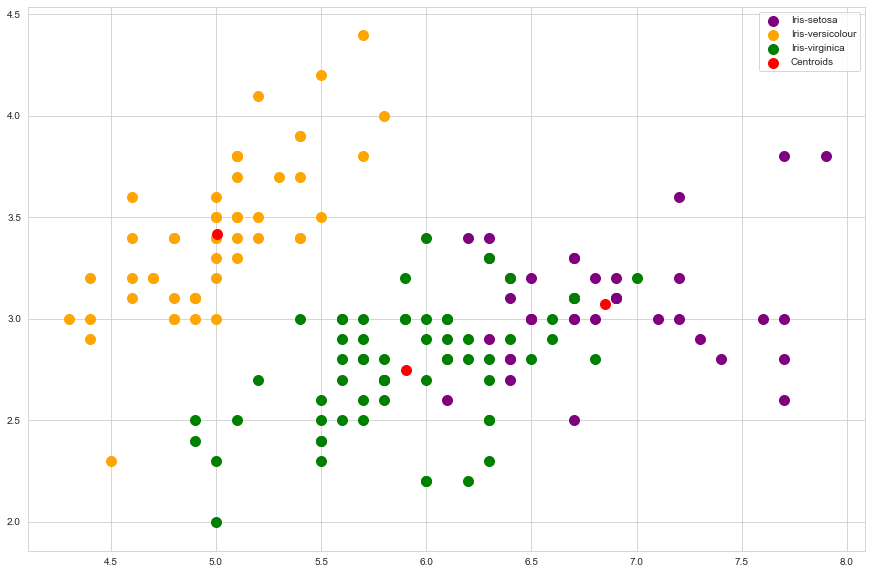

In [53]:
#Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

# correlation

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

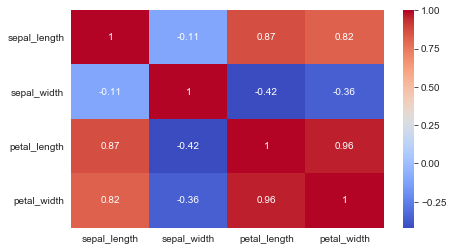

In [54]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='coolwarm') 
#draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

The Sepal Width and Sepal Length are not correlated The Petal Width and Petal Length are highly correlated

# Step 5 : Prediction

In [55]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [56]:
prediction=km.fit_predict(x)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [57]:
df['predicted']=prediction
df

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


* Here the predicted clusters are shown with the output but to compare these values we will later transform them into their   respective class name. But first to check the accuracy of the prediction value we will use confusion matrix.



In [58]:
centroids=km.cluster_centers_
centroids

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [59]:
data=df.copy()
data["species"]=data["species"].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2}).astype(int)
data['predicted']=prediction
data

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


# Above the class name are converted to respective integer value (i.e 0-''Iris-versicolor'',1-'Iris-setosa',2-'Iris-virginica') to check the confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data['species'],prediction)

array([[ 2,  0, 48],
       [ 0, 50,  0],
       [36,  0, 14]], dtype=int64)

* From the confusion matrix we can see that out of all 50 data of class Iris-versicolor 48 are correctly predicted whereas 2 are wrongly predicted as Iris-virginica. For 50 data of Iris-setosa all are wcorrectly predicted. And for 50 data of Iris-virginica 36 are correctly predicted whereas 14 are wrongly predicted as Iris-versicolor.

In [62]:
df['predicted']=prediction
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [63]:
df["predicted"]=df["predicted"].map({0:'Iris-versicolor',1:'Iris-setosa',2:'Iris-virginica'})
df

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-versicolor
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-versicolor
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-versicolor


In [64]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-versicolor
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-versicolor
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-versicolor
149,5.9,3.0,5.1,1.8,Iris-virginica,Iris-virginica


# Thank you !